# 오토인코더
- 이미지 등 입력 신호를 재구성하는 인코더로 자기 자신을 재구성하므로 오토인코더라고 한다
- 비지도 학습을 시킬 수 있다 (입력 신호가 자체가 레이블 역할을 한다)
 - 인코딩을 할 때는 입력신호보다 훨씬 작은 정보로 인코딩하여 압축된 정보로 입력을 표현하는 것이 핵심 아이디어이다
- MNIST 이미지 재구성하는 예를 보이겠다
- [참고블로그](https://idiotdeveloper.com/introduction-to-autoencoders/)


# import

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

# 데이터
- 비지도 학습이므로 레이블이 필요없다

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## 전처리
- 스케일링과 flat화

In [4]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

In [5]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat = X_test.reshape(-1, 28*28)

# 오코인코더 모델
- 1개의 히든 계층만 있는 단순한 모델

In [6]:
input_size = 784
hidden_size = 64
output_size = 784

In [7]:
x = Input(shape=(input_size,))
h = Dense(hidden_size, activation='relu')(x)
r = Dense(output_size, activation='sigmoid')(h)

autoencoder = Model(inputs=x, outputs=r)
autoencoder.compile(optimizer='adam', loss='mse')

2022-11-19 14:24:50.696341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


# 인코더 학습

In [9]:
epochs = 5
batch_size = 128

history = autoencoder.fit(X_train_flat, X_train_flat, batch_size=batch_size, 
        epochs=epochs, verbose=1, validation_data=(X_test_flat, X_test_flat))

2022-11-19 14:24:52.902862: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.0436 - val_loss: 0.0212
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0166 - val_loss: 0.0124
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0106 - val_loss: 0.0085
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.0077 - val_loss: 0.0066
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0062 - val_loss: 0.0056


## 벡터값 보기

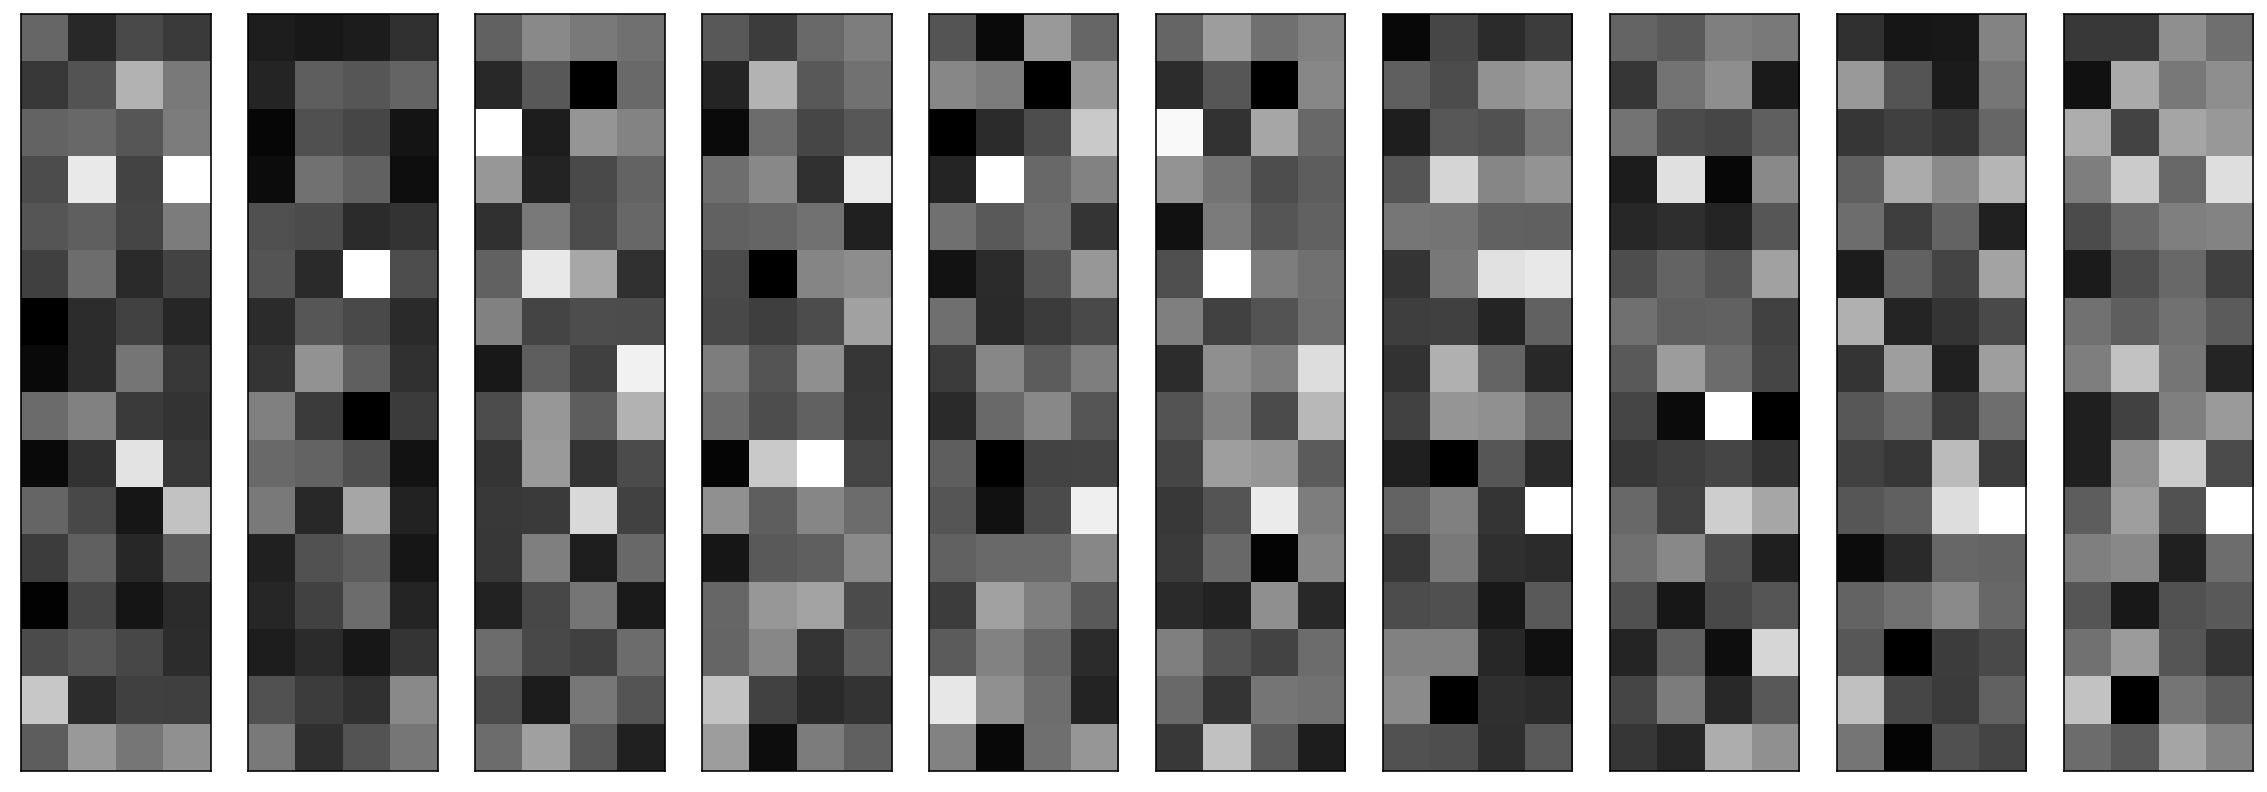

In [10]:
img_encoder = Model(x, h)
encoded_imgs = img_encoder.predict(X_test_flat)
encoded_imgs[:3]
n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 원본과 재구성된 이미지 비교

In [11]:
decoded_imgs = autoencoder.predict(X_test_flat)

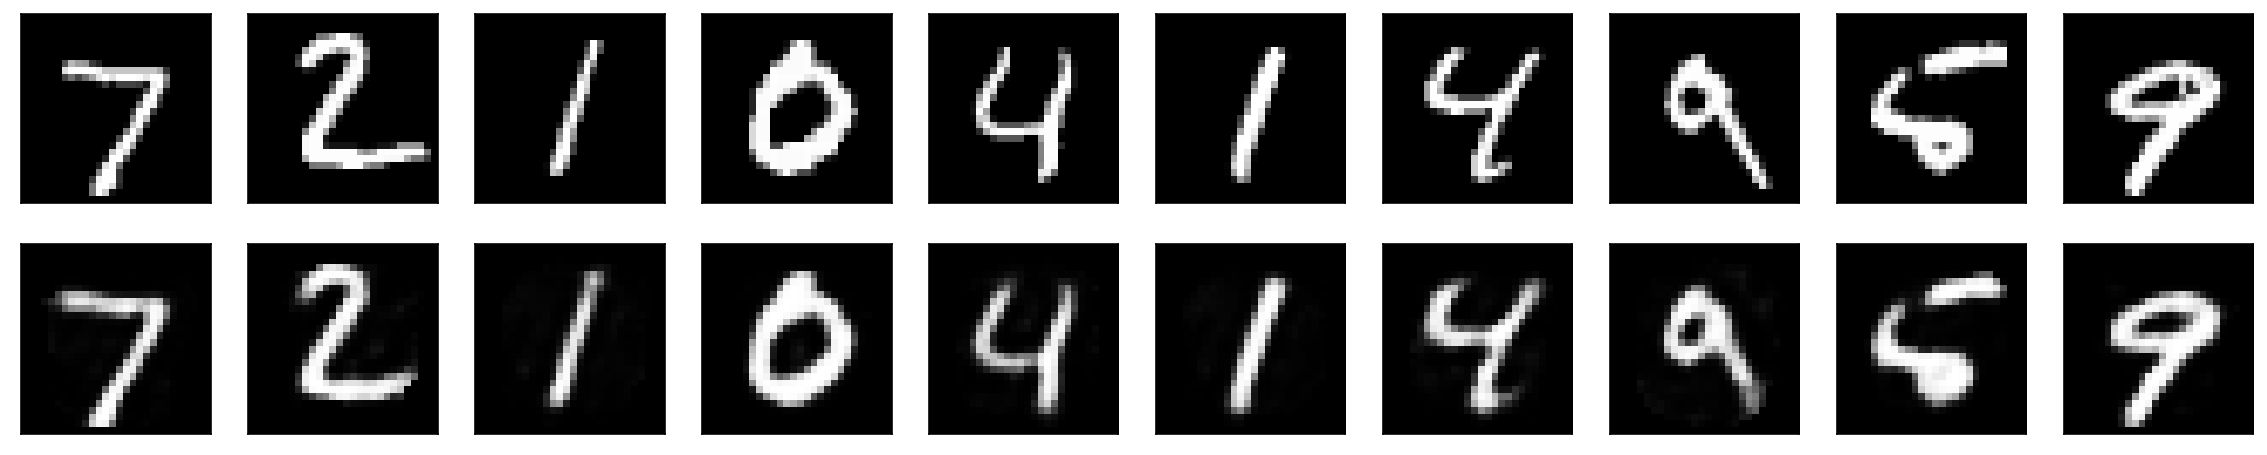

In [12]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()